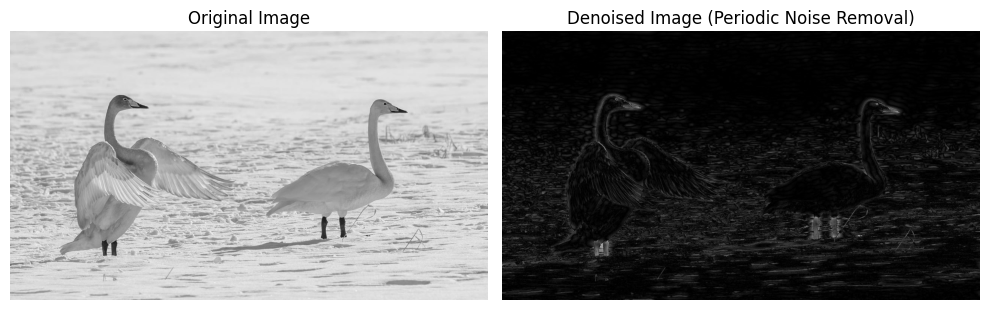

Denoised image saved as denoised_image_periodic_noise.jpg


In [1]:
# periodic_noise_removal.py

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift

def periodic_noise_removal(input_path, output_path, radius=30):
    img = Image.open(input_path)  # Open the image
    img_array = np.array(img)

    # Convert to grayscale if the image is colored
    if img_array.ndim == 3:
        img_array = img_array.mean(axis=-1).astype(np.uint8)

    # Apply Fourier Transform
    f = fft2(img_array)
    fshift = fftshift(f)

    # Create a mask to filter out the periodic noise in the frequency domain
    rows, cols = img_array.shape
    center = (rows // 2, cols // 2)
    mask = np.ones((rows, cols))

    # Set a circular region to zero in the frequency domain (notch filter)
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0])**2 + (y - center[1])**2 <= radius**2
    mask[mask_area] = 0

    # Apply the mask to filter out the periodic noise
    fshift_filtered = fshift * mask

    # Perform inverse Fourier Transform to get the filtered image back
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.abs(ifft2(f_ishift))

    # Convert back to uint8 and save the output image
    img_back = np.uint8(np.clip(img_back, 0, 255))
    denoised_img = Image.fromarray(img_back)
    denoised_img.save(output_path)

    # Display original and denoised images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img_back, cmap='gray')
    plt.title("Denoised Image (Periodic Noise Removal)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    input_path = "input.jpg"  
    output_path = "denoised_image_periodic_noise.jpg"
    periodic_noise_removal(input_path, output_path, radius=30)
    print(f"Denoised image saved as {output_path}")
